<a href="https://colab.research.google.com/github/poltorashka22/Data-analysis/blob/main/Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Программа для определения центроидов кластеров звезд

Загрузка данных из файла: 27_B_17834.csv
Загружено 9900 точек
Успешно загружено 9900 точек (звезд).
Диапазон координат: X [-2.97, 10.97], Y [-3.97, 8.97]

Параметры анализа:
  - Радиус кластера R = 3
  - Количество кластеров = 3

Выполнение кластеризации...
Отчет по результатам кластеризации звезд

1. Общая информация:
   Всего обработано звезд: 9900
   Радиус кластера (R): 3
   Количество кластеров: 3

2. Координаты центроидов кластеров:
   Кластер 1: x = 0.4301, y = 5.0231
   Кластер 2: x = 4.1124, y = -0.4850
   Кластер 3: x = 7.6530, y = 5.8751

3. Характеристики кластеров:

   Кластер 1:
   - Количество звезд: 3500
   - Макс. расстояние до центроида: 3.4045
   - Среднее расстояние до центроида: 1.9041
   - Стандартное отклонение: 0.7220
   - Соответствие условию R=3: НЕТ
   Внимание: 179 точек находятся дальше R=3 от центроида!

   Кластер 2:
   - Количество звезд: 3200
   - Макс. расстояние до центроида: 3.5094
   - Среднее ра

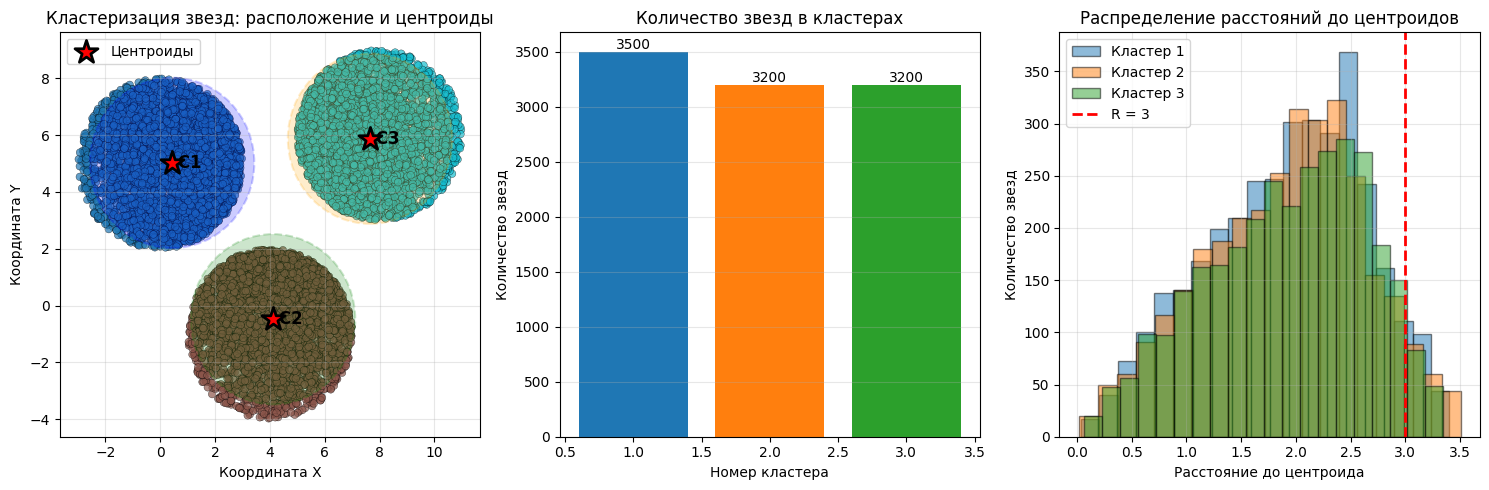


Анализ выполнен успешно!


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

print("Программа для определения центроидов кластеров звезд")

# Загружаем файл
filename = "27_B_17834.csv"
print(f"\nЗагрузка данных из файла: {filename}")

# Читаем CSV файл
df = pd.read_csv(filename, sep=';', decimal=',')
data = df.values
print(f"Загружено {len(data)} точек")

print(f"Успешно загружено {len(data)} точек (звезд).")
print(f"Диапазон координат: X [{data[:, 0].min():.2f}, {data[:, 0].max():.2f}], "
      f"Y [{data[:, 1].min():.2f}, {data[:, 1].max():.2f}]")

# Параметры задачи
R = 3
n_clusters = 3

print(f"\nПараметры анализа:")
print(f"  - Радиус кластера R = {R}")
print(f"  - Количество кластеров = {n_clusters}")

# Выполнение кластеризации (как в примере)
print("\nВыполнение кластеризации...")
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(data)
centroids = kmeans.cluster_centers_

# Анализ и вывод результатов
print("Отчет по результатам кластеризации звезд")

print(f"\n1. Общая информация:")
print(f"   Всего обработано звезд: {len(data)}")
print(f"   Радиус кластера (R): {R}")
print(f"   Количество кластеров: {len(centroids)}")

print(f"\n2. Координаты центроидов кластеров:")
for i, centroid in enumerate(centroids):
    print(f"   Кластер {i+1}: x = {centroid[0]:.4f}, y = {centroid[1]:.4f}")

print(f"\n3. Характеристики кластеров:")
for i in range(len(centroids)):
    cluster_mask = labels == i
    cluster_points = data[cluster_mask]

    # Расстояния от центроида до всех точек кластера
    distances = np.sqrt(np.sum((cluster_points - centroids[i]) ** 2, axis=1))

    print(f"\n   Кластер {i+1}:")
    print(f"   - Количество звезд: {len(cluster_points)}")
    print(f"   - Макс. расстояние до центроида: {np.max(distances):.4f}")
    print(f"   - Среднее расстояние до центроида: {np.mean(distances):.4f}")
    print(f"   - Стандартное отклонение: {np.std(distances):.4f}")
    print(f"   - Соответствие условию R={R}: {'ДА' if np.max(distances) <= R else 'НЕТ'}")

    if np.max(distances) > R:
        outliers = np.sum(distances > R)
        print(f"   Внимание: {outliers} точек находятся дальше R={R} от центроида!")

print(f"\n4. Качество кластеризации:")
# Вычисляем сумму квадратов расстояний до центроидов
total_inertia = 0
for i in range(len(centroids)):
    cluster_mask = labels == i
    if np.any(cluster_mask):
        distances_sq = np.sum((data[cluster_mask] - centroids[i]) ** 2)
        total_inertia += distances_sq

print(f"   Общая сумма квадратов расстояний: {total_inertia:.4f}")
print(f"   Среднее расстояние до центроида по всем точкам: {np.sqrt(total_inertia/len(data)):.4f}")

# Визуализация
print("\nСоздание визуализации...")

plt.figure(figsize=(15, 5))

# 1. Основной график с кластерами
plt.subplot(1, 3, 1)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='tab10', alpha=0.7, s=30, edgecolor='k', linewidth=0.3)

# Отображаем центроиды
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=300,
           label='Центроиды', edgecolors='black', linewidth=2, zorder=5)

# Рисуем круги радиусом R вокруг центроидов
colors = ['blue', 'green', 'orange']
for i, centroid in enumerate(centroids):
    circle = plt.Circle(centroid, R, color=colors[i], alpha=0.2, linestyle='--', linewidth=1.5)
    plt.gca().add_patch(circle)
    # Подписываем центроиды
    plt.text(centroid[0], centroid[1], f' C{i+1}', fontsize=12,
            fontweight='bold', verticalalignment='center')

plt.title('Кластеризация звезд: расположение и центроиды', fontsize=12)
plt.xlabel('Координата X')
plt.ylabel('Координата Y')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Гистограмма размеров кластеров
plt.subplot(1, 3, 2)
cluster_sizes = [np.sum(labels == i) for i in range(len(centroids))]
bars = plt.bar(range(1, len(centroids)+1), cluster_sizes, color=plt.cm.tab10(range(len(centroids))))
plt.title('Количество звезд в кластерах', fontsize=12)
plt.xlabel('Номер кластера')
plt.ylabel('Количество звезд')
plt.grid(True, alpha=0.3, axis='y')

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}',
            ha='center', va='bottom')

# 3. График расстояний до центроидов
plt.subplot(1, 3, 3)
for i in range(len(centroids)):
    cluster_mask = labels == i
    if np.any(cluster_mask):
        distances = np.sqrt(np.sum((data[cluster_mask] - centroids[i]) ** 2, axis=1))
        plt.hist(distances, alpha=0.5, label=f'Кластер {i+1}', bins=20, edgecolor='black')

# Линия, обозначающая радиус R
plt.axvline(x=R, color='red', linestyle='--', linewidth=2, label=f'R = {R}')
plt.title('Распределение расстояний до центроидов', fontsize=12)
plt.xlabel('Расстояние до центроида')
plt.ylabel('Количество звезд')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nАнализ выполнен успешно!")